<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks/blob/main/Marvel_L2_Task_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset from the uploaded file
df = pd.read_csv('/content/sample_data/boston.csv')

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select features and target variable (adjust based on your dataset's actual column names)
# Here we are using 'CRIM', 'RM', 'AGE', 'TAX' as features and 'MEDV' as the target (Median home value)
X = df_imputed[['CRIM', 'RM', 'AGE', 'TAX']]  # Example of selected features
y = df_imputed['MEDV']  # Target variable: house prices

# Inspect the first few rows of the dataset to understand its structure
print(df.head())

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Predicted house prices: {y_pred[:10]}")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
Mean Squared Error: 37.684624882694195
R-squared: 0.4861219037301302
Predicted house prices: [25.11859652 29.45689213 16.55409724 24.12284808 19.12906364 22.81104589
 20.93008526 20.93824942 18.74731769 20.64872095]


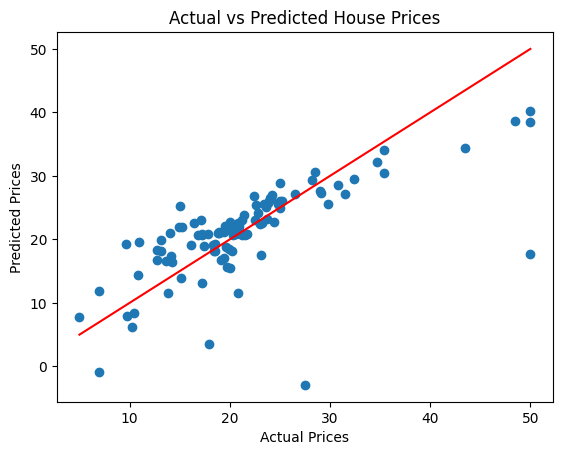

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()